In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from robot import RobotDescription
import utils

In [106]:


observations_file_select = 20
observations_file_str_dict = {20: r'observation_files/obs_single_marker_2023-11-01-11-12-21_20240109-060457.p',
                              21: r'observation_files/observations_simulated_20240109_081340.p'}
df_observations = pd.read_pickle(observations_file_str_dict[observations_file_select])
print(df_observations)

      marker_id                                                mat      t  \
0             2  [[-0.6512959642736411, 0.10584934278182084, 0....   32.2   
1             2  [[-0.6219646738877594, 0.13994134799481425, 0....   32.4   
2             2  [[-0.586827628389369, 0.17561501094231632, 0.7...   32.6   
3             1  [[-0.8596319172505427, 0.20944688727684876, 0....   32.8   
4             2  [[-0.5520186946789184, 0.20810937543488303, 0....   32.8   
...         ...                                                ...    ...   
1008          4  [[-0.8548456123773195, -0.11758664681680067, 0...  267.6   
1009          4  [[-0.8573968887430287, -0.11705664318983587, 0...  267.8   
1010          4  [[-0.857574609538824, -0.1154735421995034, 0.5...  268.0   
1011          4  [[-0.8589465995702666, -0.10754760359722929, 0...  268.2   
1012          4  [[-0.8642795087414036, -0.09588814454161206, 0...  268.4   

                                                      q  interp_dist  
0   

In [99]:
def get_marker_locations(df, marker_id):
    marker_locations = []
    theta_nom = RobotDescription.dhparams["theta_nom"].astype(float)
    d_nom = RobotDescription.dhparams["d_nom"].astype(float)
    r_nom = RobotDescription.dhparams["r_nom"].astype(float)
    alpha_nom = RobotDescription.dhparams["alpha_nom"].astype(float)
    for record in df[df['marker_id']==marker_id].to_records():
        q = np.concatenate([record['q'], np.zeros(2)])
        _loc = RobotDescription.get_marker_location(record['mat'], q, theta_nom, d_nom, r_nom, alpha_nom)
        marker_location = RobotDescription.get_alternate_tfs(_loc)
        marker_locations.append(np.concatenate([marker_location['rvec'], marker_location['tvec']]))
    return marker_locations

In [100]:
locs2 = get_marker_locations(df_observations, 2)
print(locs2)

[array([-8.98233775e-04,  2.39710026e+00,  1.55297566e-03,  1.47680803e+00,
        8.71468936e-04,  1.35236738e+00]), array([-6.72784876e-04,  2.39918147e+00,  1.26677627e-03,  1.47708410e+00,
        9.81373477e-04,  1.35203781e+00]), array([5.95593560e-04, 2.39837537e+00, 1.77637458e-03, 1.47658069e+00,
       8.39143359e-04, 1.35218687e+00]), array([-2.98794517e-03,  2.40007759e+00,  2.13028937e-03,  1.47752095e+00,
        8.74816504e-04,  1.35229698e+00]), array([-1.42555939e-03,  2.39744694e+00,  1.18314690e-03,  1.47558328e+00,
        5.61504710e-04,  1.35211033e+00]), array([-0.00350158,  2.38074652,  0.00302787,  1.54398887,  0.00370616,
        1.36027452]), array([ 1.44110230e-04,  2.39813963e+00, -1.31474299e-03,  1.47695545e+00,
        1.39073507e-03,  1.35217879e+00]), array([ 2.58542228e-04,  2.40021913e+00, -9.56214830e-04,  1.47786087e+00,
        1.58150167e-03,  1.35243126e+00]), array([-1.20860475e-03,  2.39955680e+00,  1.10316779e-03,  1.47738252e+00,
        1.

In [77]:
from sklearn.covariance import EmpiricalCovariance, MinCovDet

# fit a MCD robust estimator to data
robust_cov = MinCovDet().fit(locs2)
# fit a MLE estimator to data
emp_cov = EmpiricalCovariance().fit(locs2)
print(
    "Estimated covariance matrix:\nMCD (Robust):\n{}\nMLE:\n{}".format(
        robust_cov.covariance_, emp_cov.covariance_
    )
)

print(robust_cov.location_)

Estimated covariance matrix:
MCD (Robust):
[[ 2.35789804e-06  4.33097063e-07 -1.73638881e-07  2.83881091e-07
  -1.15207155e-08  9.43463939e-08]
 [ 4.33097063e-07  3.09153354e-06 -3.81381883e-07  1.96721847e-06
   2.45728602e-08  1.98281453e-07]
 [-1.73638881e-07 -3.81381883e-07  1.24866072e-06 -2.42703594e-07
  -8.77245672e-08 -1.32822096e-08]
 [ 2.83881091e-07  1.96721847e-06 -2.42703594e-07  1.52727508e-06
   2.46170379e-08  1.59109053e-07]
 [-1.15207155e-08  2.45728602e-08 -8.77245672e-08  2.46170379e-08
   4.34445777e-08  6.50322635e-09]
 [ 9.43463939e-08  1.98281453e-07 -1.32822096e-08  1.59109053e-07
   6.50322635e-09  3.81692640e-08]]
MLE:
[[ 2.56649790e-06  1.32957243e-06 -2.28279374e-08 -4.59798042e-06
  -1.17722423e-07 -4.85796827e-07]
 [ 1.32957243e-06  1.35890162e-05 -1.10871685e-06 -3.24311932e-05
  -1.24098637e-06 -3.83215411e-06]
 [-2.28279374e-08 -1.10871685e-06  1.39786363e-06  3.63893482e-06
   8.27661419e-08  4.47394491e-07]
 [-4.59798042e-06 -3.24311932e-05  3.63893

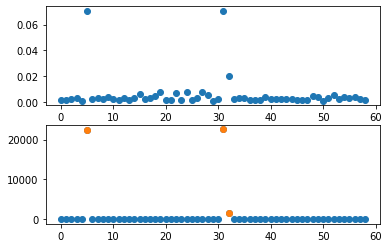

In [84]:
fig, (ax1, ax2) = plt.subplots(2,1)
dists = [np.linalg.norm(loc - robust_cov.location_) for loc in locs2]
mdist = robust_cov.dist_
ax1.scatter(np.arange(len(dists)), dists)
ax2.scatter(np.arange(len(mdist)), mdist)
ax2.scatter(np.arange(len(mdist))[np.where(mdist > 100)], mdist[np.where(mdist > 100)])

In [102]:
def reject_outliers_by_mahalanobis_dist(dataframe, threshold):
    dataframe_filt = pd.DataFrame()
    marker_ids = dataframe['marker_id'].unique()
    for marker_id in marker_ids:
        locations = get_marker_locations(dataframe, marker_id)
        robust_cov = MinCovDet().fit(locations)
        
    #return np.where(robust_cov.dist_ > threshold)

In [103]:
pose_outliers_by_mahalanobis_dist(locs2, 1000)

(array([ 5, 31, 32]),)

In [104]:
reject_outliers_by_mahalanobis_dist(df_observations, 1000)

[2 1 4 7 5]
